In [35]:
import pymysql 
pymysql.install_as_MySQLdb() 
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from config import mysql_un, mysql_pw, mysql_uri, mysql_port
from sqlalchemy_utils import create_database, database_exists
from ski_resort import SkiResort, Base
import matplotlib.pyplot as plt

In [36]:
connection_string = f"mysql://{mysql_un}:{mysql_pw}@{mysql_uri}:{mysql_port}/snow_report"
if not database_exists(connection_string):
	create_database(connection_string)
engine = create_engine(connection_string)
Base.metadata.create_all(engine)
session = Session(bind=engine)


In [37]:
query = 'select * from resorts r left join ski_resort_stats s on r.resort_name = s.resort_name order by r.inches_24_hr desc, r.inches_72_hr desc limit 10'

In [38]:
df=pd.read_sql_query(query, session.bind)

In [39]:
df.head(10)

,id,resort_name,open_status,inches_24_hr,inches_72_hr,open_lifts_pct,scrape_timestamp,resort_name,state,summit,...,runs,acres,green_percent,green_acres,blue_percent,blue_acres,black_percent,black_acres,lat,lon
0,22,Snowbird,1,30,43,0.785714,2019-01-18 22:40:54,Snowbird,UT,11000.0,...,89.0,2500.0,0.27,675.00,0.38,950.0,0.35,875.00,40.58,-111.65
1,166,June Mountain,1,27,52,1.000000,2019-01-18 22:40:54,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,Brighton Resort,1,24,38,1.000000,2019-01-18 22:40:54,Brighton Resort,UT,10500.0,...,66.0,1050.0,0.21,220.50,0.40,420.0,0.39,409.50,40.60,-111.58
3,30,Sundance,1,23,37,1.000000,2019-01-18 22:40:54,Sundance,UT,8250.0,...,42.0,450.0,0.20,90.00,0.40,180.0,0.40,180.00,40.41,-111.58
4,66,Deer Valley Resort,1,23,30,1.000000,2019-01-18 22:40:54,Deer Valley Resort,UT,9570.0,...,100.0,2026.0,0.27,547.02,0.40,810.4,0.33,668.58,40.61,-111.50
5,27,Solitude Mountain Resort,1,22,31,0.777778,2019-01-18 22:40:54,Solitude Mountain Resort,UT,10035.0,...,65.0,1200.0,0.20,240.00,0.50,600.0,0.30,360.00,40.63,-111.59
6,3,Squaw Valley - Alpine Meadows,1,21,73,0.404762,2019-01-18 22:40:54,Squaw Valley - Alpine Meadows,CA,9050.0,...,170.0,3600.0,0.25,900.00,0.45,1620.0,0.30,1080.00,36.74,-119.25
7,21,Alta Ski Area,1,21,37,0.666667,2019-01-18 22:40:54,Alta Ski Area,UT,10550.0,...,116.0,2200.0,0.25,550.00,0.40,880.0,0.35,770.00,40.60,-111.64
8,67,Park City,1,21,29,0.975610,2019-01-18 22:40:54,Park City,UT,10000.0,...,344.0,7300.0,0.09,657.00,0.51,3723.0,0.40,2920.00,40.68,-111.48
9,75,Ski China Peak,1,20,38,0.545455,2019-01-18 22:40:54,Ski China Peak,CA,8709.0,...,45.0,1200.0,0.11,132.00,0.28,336.0,0.61,732.00,40.90,-123.34


In [40]:
df['lifts']

0    12.0
1     NaN
2     5.0
3     5.0
4    21.0
5     7.0
6    30.0
7    11.0
8    41.0
9    11.0
Name: lifts, dtype: float64

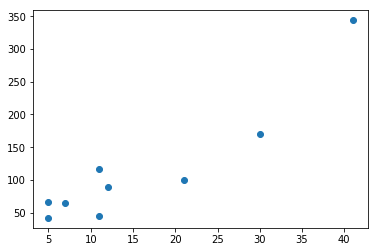

In [45]:
plt.scatter(df['lifts'], df['runs'])

In [42]:
engine.table_names()

['resorts', 'ski_resort_stats']

In [31]:
conn.execute()

TypeError: execute() missing 1 required positional argument: 'object'

In [ ]:
Resorts = Base.classes.resorts

In [30]:
conn = engine.connect()

In [ ]:
conn